# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv
! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/column_names.json

"wget" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
"wget" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, 1:-1].astype(int) # drop index column
target = dataset[:, -1]
print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 18) (846,)
(549, 18) (549,) (297, 18) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [4]:
import json

ft_names = None
with open('column_names.json', 'r') as json_file:
    ft_names = json.load(json_file)

ft_names = list(map(lambda s: s.lower(), ft_names))[:-1]

X_train_pd = pd.DataFrame(X_train, columns=list(ft_names))
X_train_pd['label'] = y_train

X_test_pd = pd.DataFrame(X_test, columns=list(ft_names))
X_test_pd['label'] = y_test


# First 15 rows of our dataset.
X_train_pd.head(15)

compactness  circularity  distance circularity  radius ratio  \
0            95           41                    82           170   
1           104           57                   103           222   
2            91           42                    66           169   
3           109           52                    95           189   
4            95           47                    73           195   
5            81           44                    72           139   
6            93           34                    66           140   
7            89           43                    77           147   
8           117           52                   110           228   
9           109           49                   109           193   
10           94           46                    79           181   
11           89           36                    69           162   
12           84           39                    90           180   
13           95           46                    76           162   
14           86           47                    75           165   

    praxis aspect ratio  maxlength aspect ratio  scatter ratio  elongatedness  \
0                    65                       9            145             46   
1                    72                      12            221             30   
2                    66                       7            145             44   
3                    58                       4            227             29   
4                    70                       7            167             38   
5                    60                       6            153             44   
6                    56                       7            130             51   
7                    54                       8            144             46   
8                    65                      12            212             31   
9                    59                      10            207             32   
10                   62                       8            167             40   
11                   63                       6            140             48   
12                   60                       7            177             37   
13                   66                      11            162             42   
14                   68                       6            154             43   

    praxis rectangularity  maxlength rectangularity  \
0                      19                       145   
1                      25                       177   
2                      19                       140   
3                      25                       158   
4                      20                       152   
5                      19                       146   
6                      18                       120   
7                      19                       146   
8                      24                       163   
9                      24                       156   
10                     20                       148   
11                     18                       131   
12                     21                       131   
13                     20                       155   
14                     19                       146   

    scaled variance along major axis  scaled variance along minor axis  \
0                                163                               314   
1                                223                               718   
2                                169                               325   
3                                262                               776   
4                                184                               430   
5                                180                               347   
6                                151                               251   
7                                163                               308   
8                                228                               668 

Methods `describe` and `info` deliver some useful information.

### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

##### 1. Duplicates detection

COMPACTNESS (average perim)**2/area

CIRCULARITY (average radius)**2/area

DISTANCE CIRCULARITY area/(av.distance from border)**2

RADIUS RATIO (max.rad-min.rad)/av.radius

PR.AXIS ASPECT RATIO (minor axis)/(major axis)

MAX.LENGTH ASPECT RATIO (length perp. max length)/(max length)

SCATTER RATIO (inertia about minor axis)/(inertia about major axis)

ELONGATEDNESS area/(shrink width)**2

PR.AXIS RECTANGULARITY area/(pr.axis length*pr.axis width)

MAX.LENGTH RECTANGULARITY area/(max.length*length perp. to this)

SCALED VARIANCE (2nd order moment about minor axis)/area
ALONG MAJOR AXIS

SCALED VARIANCE (2nd order moment about major axis)/area
ALONG MINOR AXIS

SCALED RADIUS OF GYRATION (mavar+mivar)/area

SKEWNESS ABOUT (3rd order moment about major axis)/sigma_min**3
MAJOR AXIS

SKEWNESS ABOUT (3rd order moment about minor axis)/sigma_maj**3
MINOR AXIS

KURTOSIS ABOUT (4th order moment about major axis)/sigma_min**4
MINOR AXIS

KURTOSIS ABOUT (4th order moment about minor axis)/sigma_maj**4
MAJOR AXIS

HOLLOWS RATIO (area of hollows)/(area of bounding polygon)

Where sigma_maj**2 is the variance along the major axis and sigma_min**2 is the variance along the minor axis, and

area of hollows= area of bounding poly-area of object

In [5]:
X_train_pd.describe().T

count        mean         std    min    25%  \
compactness                       549.0   93.520947    8.063277   76.0   87.0   
circularity                       549.0   44.675774    6.154680   33.0   40.0   
distance circularity              549.0   81.801457   15.928751   42.0   70.0   
radius ratio                      549.0  168.204007   33.047995  104.0  140.0   
praxis aspect ratio               549.0   61.644809    7.110666   47.0   57.0   
maxlength aspect ratio            549.0    8.457195    3.945857    2.0    7.0   
scatter ratio                     549.0  167.327869   32.506680  114.0  146.0   
elongatedness                     549.0   41.273224    7.777590   26.0   34.0   
praxis rectangularity             549.0   20.468124    2.526030   17.0   19.0   
maxlength rectangularity          549.0  147.438980   14.631309  118.0  136.0   
scaled variance along major axis  549.0  186.734062   30.436279  131.0  167.0   
scaled variance along minor axis  549.0  431.540984  171.479332  191.0  317.0   
scaled radius of gyration         549.0  173.763206   31.793047  112.0  148.0   
skewness about major axis         549.0   72.158470    7.335198   59.0   67.0   
skewness about minor axis         549.0    6.522769    4.980796    0.0    2.0   
kurtosis about minor axis         549.0   12.646630    8.833356    0.0    6.0   
kurtosis about major axis         549.0  188.998179    6.298389  176.0  184.0   
hollows ratio                     549.0  195.854281    7.449629  181.0  191.0   

                                    50%    75%     max  
compactness                        93.0   99.0   117.0  
circularity                        44.0   49.0    59.0  
distance circularity               79.0   98.0   110.0  
radius ratio                      165.0  195.0   306.0  
praxis aspect ratio                61.0   66.0   126.0  
maxlength aspect ratio              8.0   10.0    52.0  
scatter ratio                     157.0  196.0   265.0  
elongatedness                      43.0   46.0    59.0  
praxis rectangularity              20.0   23.0    29.0  
maxlength rectangularity          145.0  159.0   186.0  
scaled variance along major axis  177.0  216.0   288.0  
scaled variance along minor axis  363.0  576.0  1018.0  
scaled radius of gyration         173.0  196.0   268.0  
skewness about major axis          71.0   75.0   127.0  
skewness about minor axis           6.0   10.0    22.0  
kurtosis about minor axis          11.0   19.0    40.0  
kurtosis about major axis         189.0  193.0   206.0  
hollows ratio                     197.0  201.0   211.0

As we can see, radius ratio and scatter ratio have similar mean, std and percentiles. Maybe we should remove one of them? The hypothesis is that they provide same information to the model.

Some kind of radius information we already has in circularity, so let's delete radius ratio.

In [6]:
del X_train_pd['radius ratio']
del X_test_pd['radius ratio']

##### 2. Outliers detection


Bad key text.latex.preview in file c:\users\user\appdata\local\programs\python\python37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file c:\users\user\appdata\local\programs\python\python37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file c:\users\user\appdata\local\programs\python\python37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_

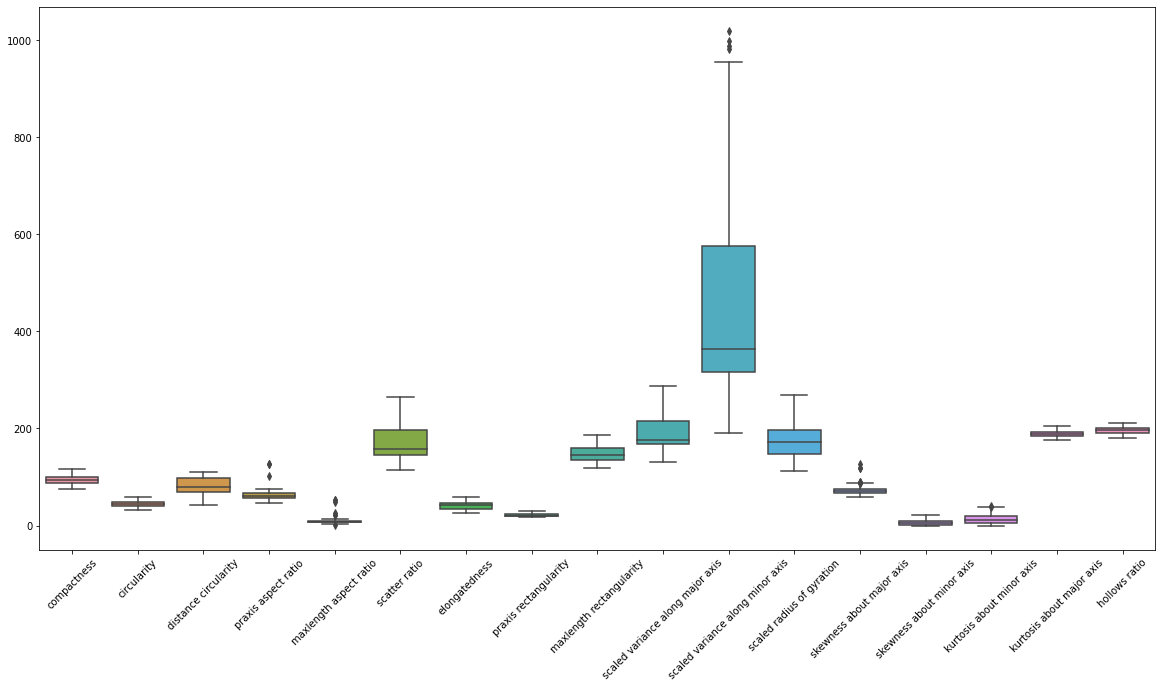

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.xticks(rotation=45)
ax = sns.boxplot(data=X_train_pd)

There are some columns with them.

##### 3. Data analysis

<Figure size 1440x720 with 0 Axes>

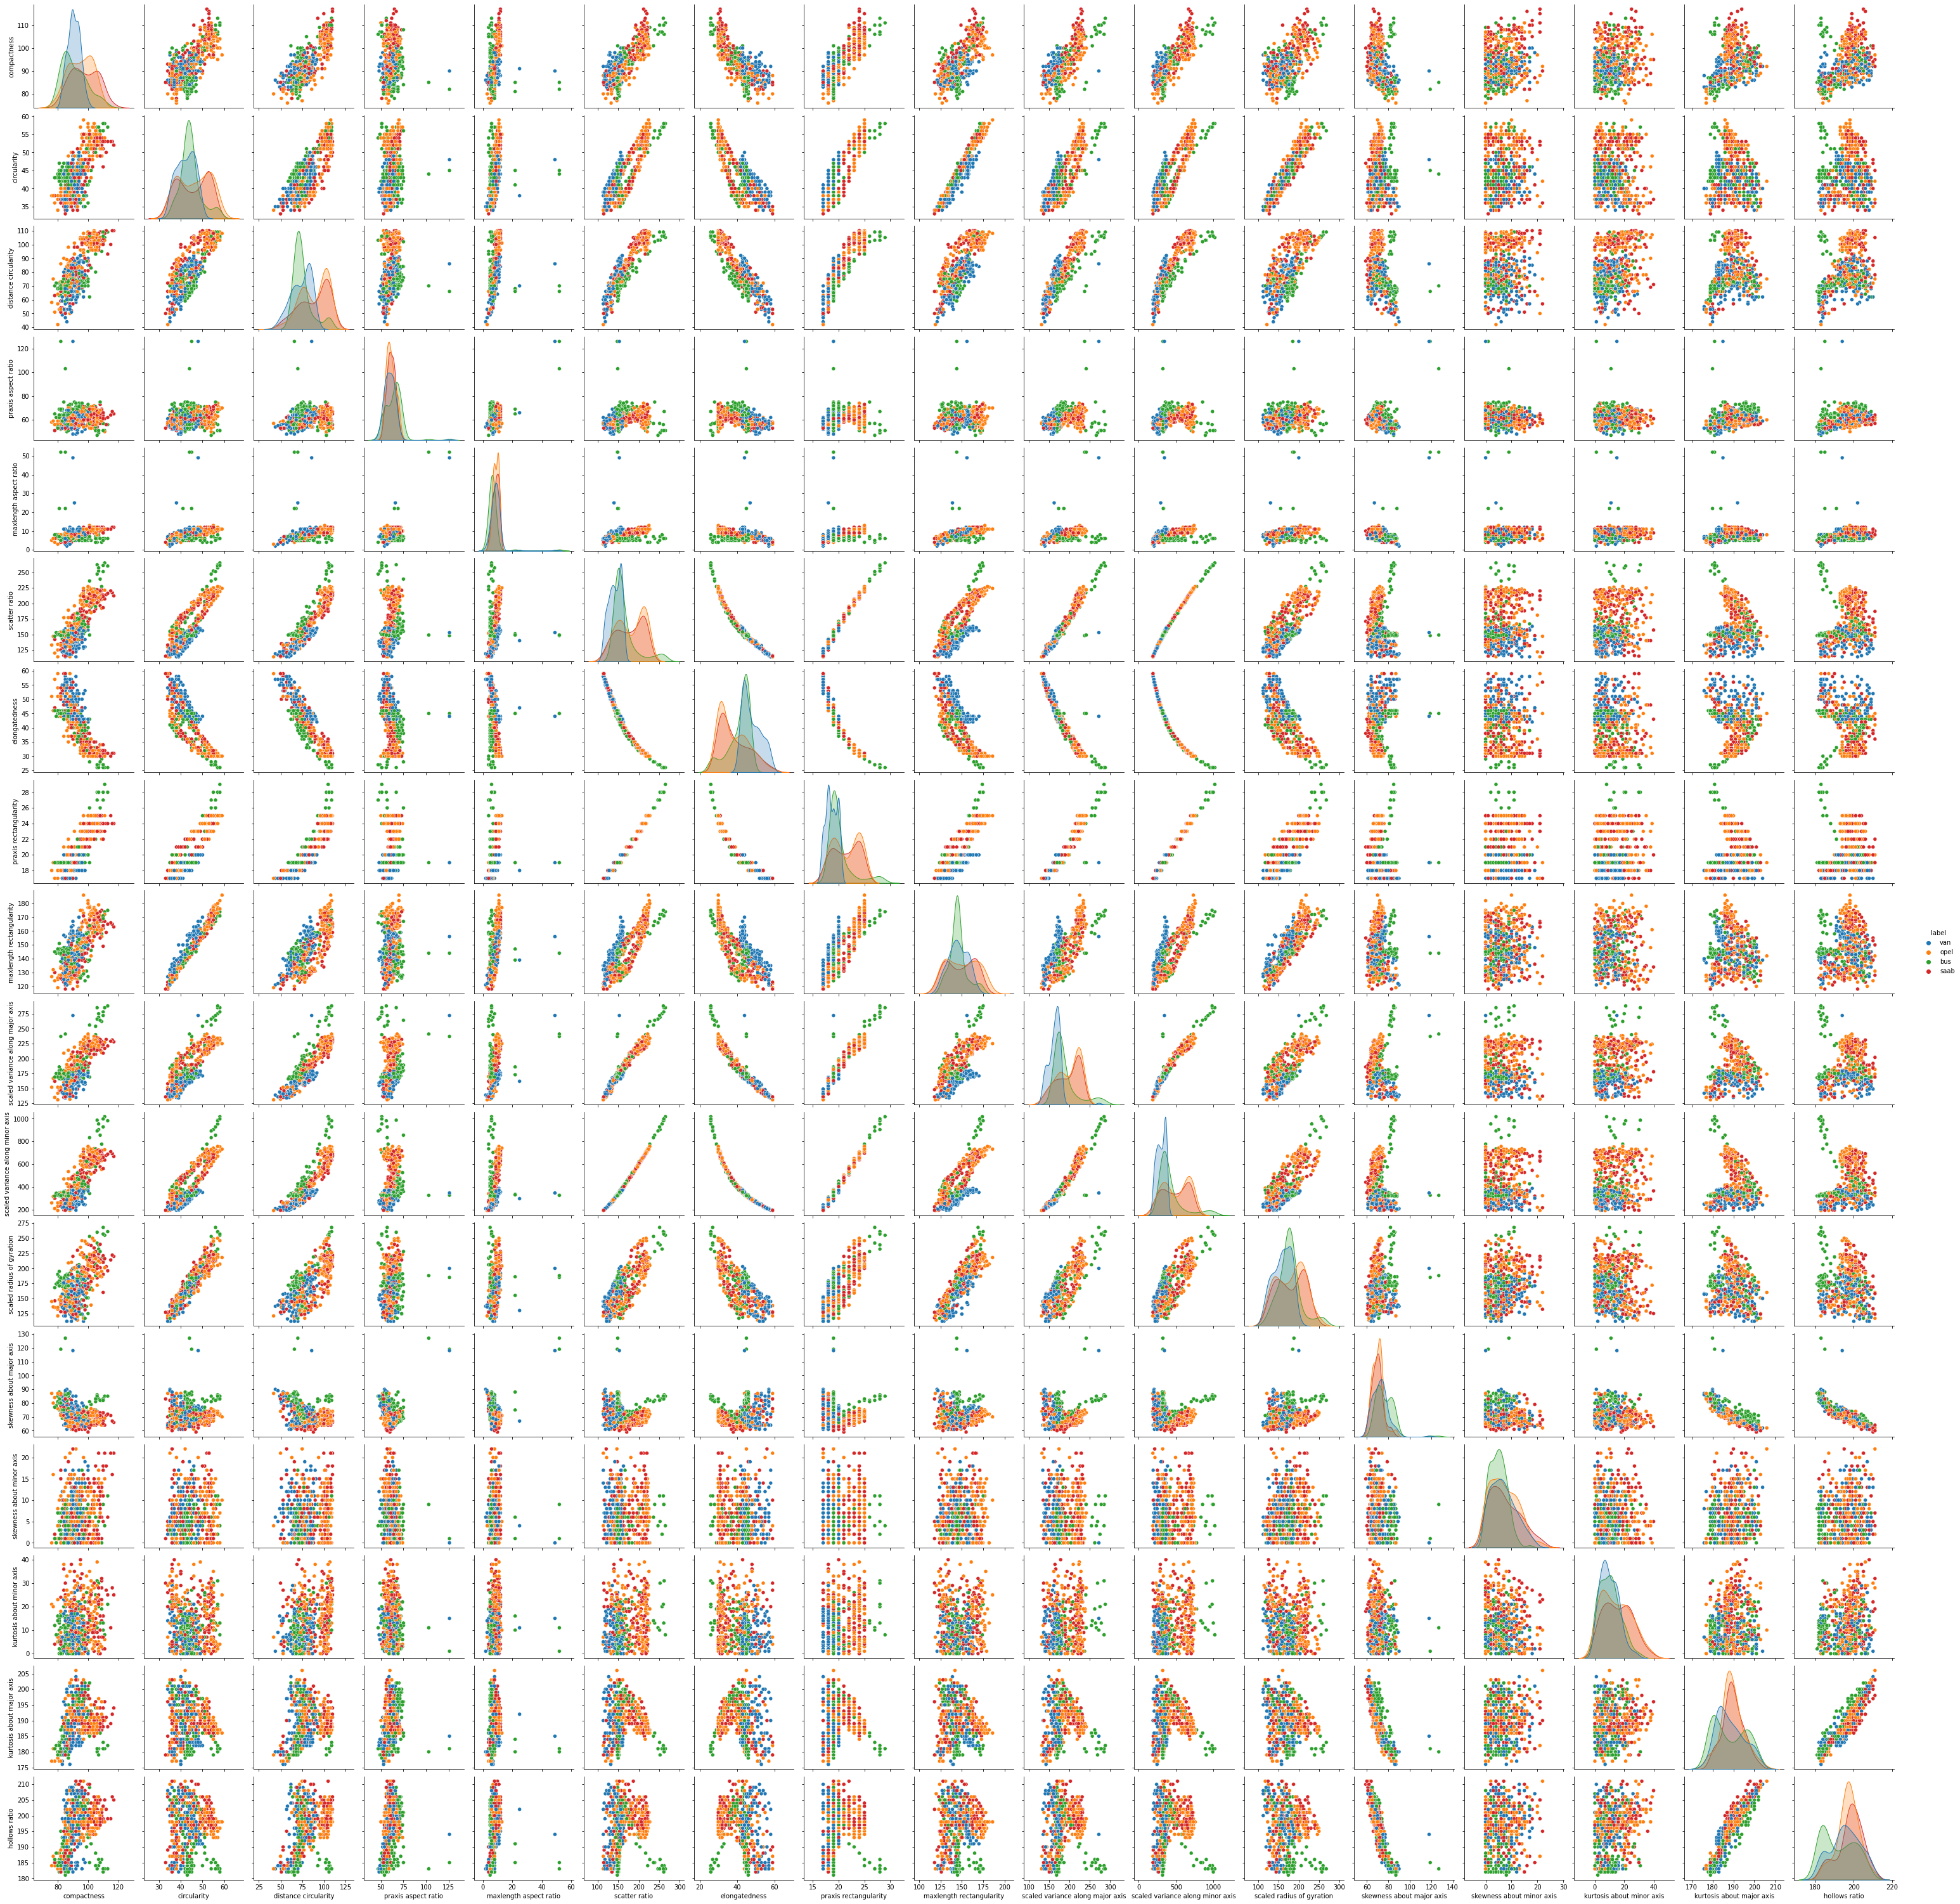

In [8]:
plt.figure(figsize=(20, 10))
sns.pairplot(X_train_pd, hue='label', diag_kind='kde')


From the plot:
- Compactness > 100 => almost surely van
- Много чего распределено нормально (compactness, praxis aspect ratio, etc)
- max len rectangularity > 150 => bus
- выбросы чаще всего встречаются в метках van и bus

In [9]:
# X_train_pd['is_compactness_more_100'] = (X_train_pd['compactness'] > 100).astype(int)
# X_train_pd = X_train_pd.replace({'label': {'bus': 0, 'opel': 1, 'saab': 2, 'van': 3}})

# X_test_pd['is_compactness_more_100'] = (X_test_pd['compactness'] > 100).astype(int)
# X_test_pd = X_test_pd.replace({'label': {'bus': 0, 'opel': 1, 'saab': 2, 'van': 3}})

Теперь посмотрим на информацию о распределении таргетов.

In [10]:
X_train_pd['label'].value_counts()

opel    152
saab    133
van     132
bus     132
Name: label, dtype: int64

Дисбаланс есть, но не очень большой.

Посмотрим на признаки, в которых заметили выбросы.

In [11]:
X_train_pd.columns

Index(['compactness', 'circularity', 'distance circularity',
       'praxis aspect ratio', 'maxlength aspect ratio', 'scatter ratio',
       'elongatedness', 'praxis rectangularity', 'maxlength rectangularity',
       'scaled variance along major axis', 'scaled variance along minor axis',
       'scaled radius of gyration', 'skewness about major axis',
       'skewness about minor axis', 'kurtosis about minor axis',
       'kurtosis about major axis', 'hollows ratio', 'label'],
      dtype='object')

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Box Plot')

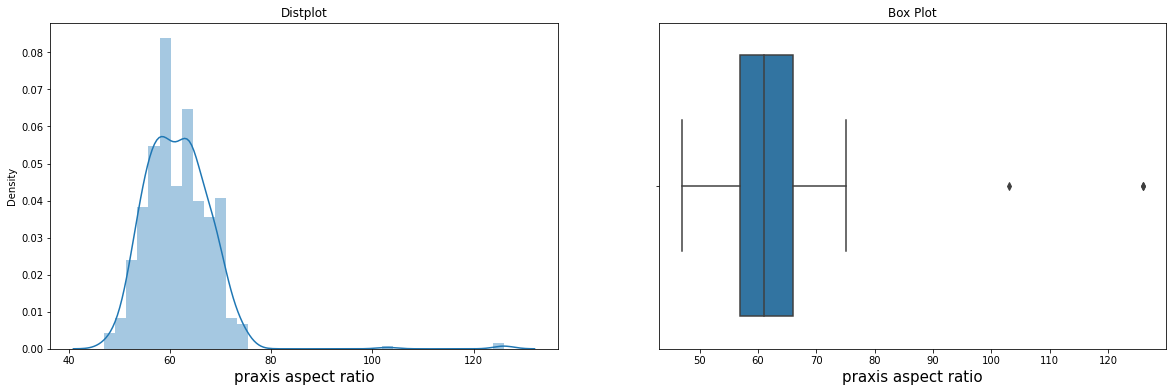

In [12]:
outliers_cols = []

ft_name = 'praxis aspect ratio'
outliers_cols.append(ft_name)

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))

fig.set_size_inches(20,6)
sns.distplot(X_train_pd[ft_name], ax=ax1)

ax1.set_xlabel(ft_name, fontsize=15)
ax1.set_title("Distplot")

sns.boxplot(X_train_pd[ft_name], ax=ax2)
ax2.set_xlabel(ft_name, fontsize=15)
ax2.set_title("Box Plot")

praxis aspect ratio сосредоточен в 40-80 интервале, распределение нормальное

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Box Plot')

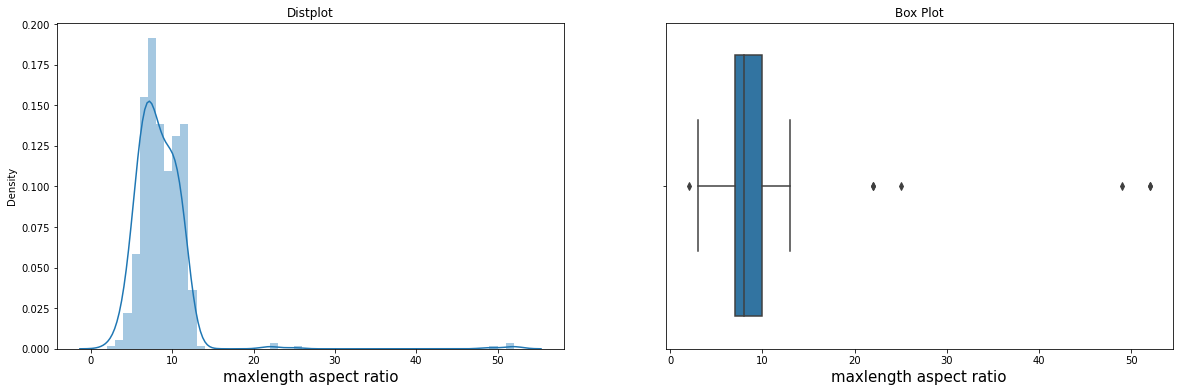

In [13]:
ft_name = 'maxlength aspect ratio'
outliers_cols.append(ft_name)

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))

fig.set_size_inches(20,6)
sns.distplot(X_train_pd[ft_name], ax=ax1)

ax1.set_xlabel(ft_name, fontsize=15)
ax1.set_title("Distplot")

sns.boxplot(X_train_pd[ft_name], ax=ax2)
ax2.set_xlabel(ft_name, fontsize=15)
ax2.set_title("Box Plot")

maxlength aspect ratio сосредоточен в 0-20 интервале, распределение нормальное

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Box Plot')

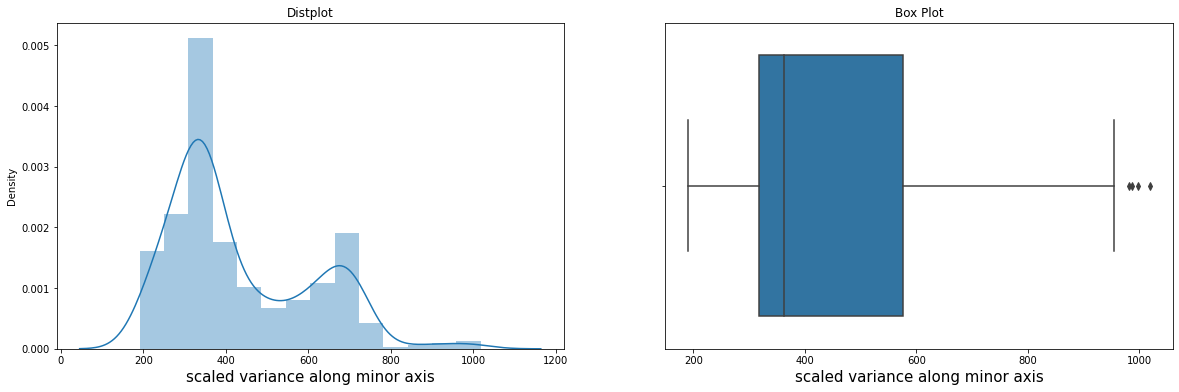

In [14]:
ft_name = 'scaled variance along minor axis'
outliers_cols.append(ft_name)

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))

fig.set_size_inches(20,6)
sns.distplot(X_train_pd[ft_name], ax=ax1)

ax1.set_xlabel(ft_name, fontsize=15)
ax1.set_title("Distplot")

sns.boxplot(X_train_pd[ft_name], ax=ax2)
ax2.set_xlabel(ft_name, fontsize=15)
ax2.set_title("Box Plot")

scaled variance along minor axis сосредоточен в 0-900 интервале

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Box Plot')

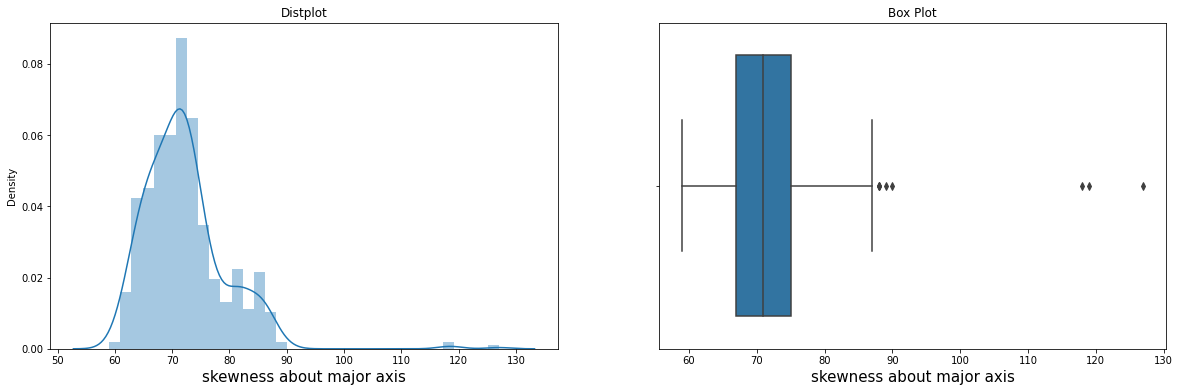

In [15]:
ft_name = 'skewness about major axis'
outliers_cols.append(ft_name)

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))

fig.set_size_inches(20,6)
sns.distplot(X_train_pd[ft_name], ax=ax1)

ax1.set_xlabel(ft_name, fontsize=15)
ax1.set_title("Distplot")

sns.boxplot(X_train_pd[ft_name], ax=ax2)
ax2.set_xlabel(ft_name, fontsize=15)
ax2.set_title("Box Plot")

skewness about major axis сосредоточен в 50-90 интервале

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Box Plot')

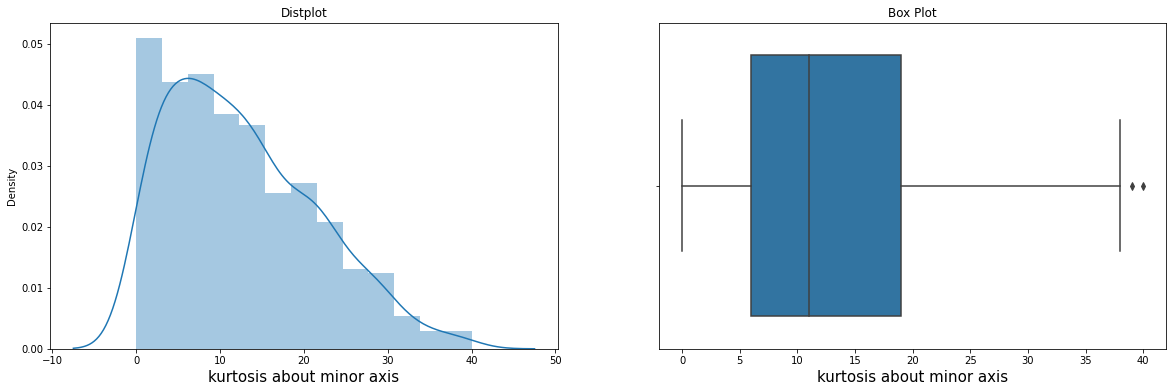

In [16]:
ft_name = 'kurtosis about minor axis'
outliers_cols.append(ft_name)

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))

fig.set_size_inches(20,6)
sns.distplot(X_train_pd[ft_name], ax=ax1)

ax1.set_xlabel(ft_name, fontsize=15)
ax1.set_title("Distplot")

sns.boxplot(X_train_pd[ft_name], ax=ax2)
ax2.set_xlabel(ft_name, fontsize=15)
ax2.set_title("Box Plot")

skewness about major axis сосредоточен в 0-40 интервале

Теперь надо решить, что делать с выбросами. Можно просто убрать. Но лучше не стоит, можем потерять важную информацию о других признаках исключенных значений.

In [17]:
mask = (X_train_pd[outliers_cols[0]] > 80) | (X_train_pd[outliers_cols[0]] < 40)
X_train_pd.loc[mask, outliers_cols[0]] = X_train_pd[outliers_cols[0]].median()

mask = (X_train_pd[outliers_cols[1]] > 20) | (X_train_pd[outliers_cols[1]] < 0)
X_train_pd.loc[mask, outliers_cols[1]] = X_train_pd[outliers_cols[1]].median()

mask = (X_train_pd[outliers_cols[2]] > 900) | (X_train_pd[outliers_cols[2]] < 0)
X_train_pd.loc[mask, outliers_cols[2]] = X_train_pd[outliers_cols[2]].median()

mask = (X_train_pd[outliers_cols[3]] > 90) | (X_train_pd[outliers_cols[3]] < 50)
X_train_pd.loc[mask, outliers_cols[3]] = X_train_pd[outliers_cols[3]].median()

mask = (X_train_pd[outliers_cols[4]] > 40) | (X_train_pd[outliers_cols[4]] < 0)
X_train_pd.loc[mask, outliers_cols[4]] = X_train_pd[outliers_cols[4]].median()

Т.к. мы не удаляли никаких данных, такую же технику можно применить к тестовым данным:

In [18]:
mask = (X_test_pd[outliers_cols[0]] > 80) | (X_test_pd[outliers_cols[0]] < 40)
X_test_pd.loc[mask, outliers_cols[0]] = X_test_pd[outliers_cols[0]].median()

mask = (X_test_pd[outliers_cols[1]] > 20) | (X_test_pd[outliers_cols[1]] < 0)
X_test_pd.loc[mask, outliers_cols[1]] = X_test_pd[outliers_cols[1]].median()

mask = (X_test_pd[outliers_cols[2]] > 900) | (X_test_pd[outliers_cols[2]] < 0)
X_test_pd.loc[mask, outliers_cols[2]] = X_test_pd[outliers_cols[2]].median()

mask = (X_test_pd[outliers_cols[3]] > 90) | (X_test_pd[outliers_cols[3]] < 50)
X_test_pd.loc[mask, outliers_cols[3]] = X_test_pd[outliers_cols[3]].median()

mask = (X_test_pd[outliers_cols[4]] > 40) | (X_test_pd[outliers_cols[4]] < 0)
X_test_pd.loc[mask, outliers_cols[4]] = X_test_pd[outliers_cols[4]].median()

Посмотрим на корреляцию признаков:

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


<AxesSubplot:title={'center':'Correlation of Attributes'}>

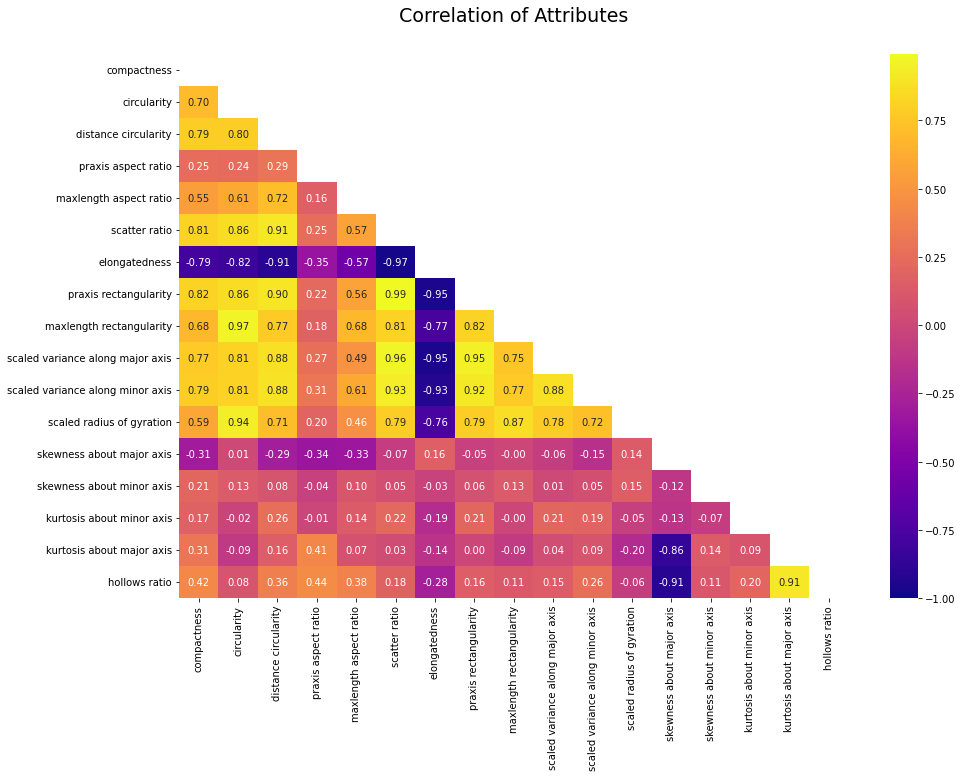

In [19]:
mask = np.zeros_like(X_train_pd.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15,10))
plt.title('Correlation of Attributes', y=1.05, size=19)
sns.heatmap(X_train_pd.corr(),vmin=-1, cmap='plasma', annot=True, mask=mask, fmt='.2f')

Есть много высокоскоррелированных признаков. Возможно, с ними поможет справиться PCA, уменьшая размерность есть вероятность, что потеряем мало информации.

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [21]:
trainee, trainee_y = X_train_pd.drop(columns=['label']), X_train_pd['label']
testee, testee_y = X_test_pd.drop(columns=['label']), X_test_pd['label']

In case l1/l2 usage we need to normalize data:

In [22]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(trainee)

trainee = scaler.transform(trainee)
testee  = scaler.transform(testee)

In [23]:
parameters = {'penalty':['none', 'l2'],
              'C': [0.0001, 0.001, 0.01, 0.1, 0.5, 1]}

clf = LogisticRegression(random_state=42, multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
cv = RepeatedStratifiedKFold(n_splits=6, n_repeats=3, random_state=42)
grid_search = GridSearchCV(estimator=clf, param_grid=parameters, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)

grid_search = grid_search.fit(trainee, trainee_y)

print("tuned hyperparameters :(best parameters) ", grid_search.best_params_)
print("accuracy :", grid_search.best_score_)

logreg_best_params = grid_search.best_params_

tuned hyperparameters :(best parameters)  {'C': 0.0001, 'penalty': 'none'}
accuracy : 0.767512077294686


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


In [24]:
grid_search.best_estimator_, grid_search.best_estimator_.penalty, grid_search.best_estimator_.C

(LogisticRegression(C=0.0001, max_iter=500, multi_class='multinomial',
                    penalty='none', random_state=42, solver='saga', tol=0.001),
 'none',
 0.0001)

In [25]:
bclf = LogisticRegression(max_iter=500, multi_class='multinomial', random_state=42, solver='saga', tol=0.001, penalty='none', C=0.0001)
bclf = bclf.fit(trainee, trainee_y)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


In [26]:
from sklearn.metrics import accuracy_score, f1_score

accuracy_score(testee_y, bclf.predict(testee)), f1_score(testee_y, bclf.predict(testee), average='weighted')

(0.7845117845117845, 0.7849637261401967)

Думаю, сойдет.

In [27]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

! pip install scikit-plot

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

<Figure size 1440x1440 with 0 Axes>

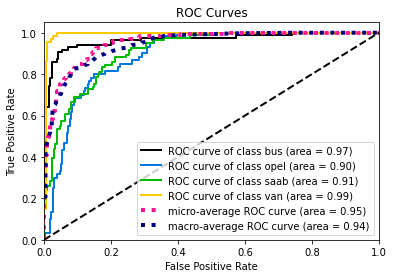

In [28]:
from scikitplot.metrics import plot_roc

plt.figure(figsize=(20, 20))
plot_roc(testee_y, bclf.predict_proba(testee))

Класс van предсказываем лучше всего (возможно, это имеет связь с наблюдениеми в начале про compactness и т.п., модель их смогла выделить)

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explained variance plot. 

In [29]:
from sklearn.decomposition import PCA

m = 10
pca = PCA(n_components=m)
pca = pca.fit(trainee)

print(f"E(m=10) ratio is: {np.sum(pca.explained_variance_ratio_)}")

E(m=10) ratio is: 0.9858245814277558


In [30]:
pca.explained_variance_

array([9.21983725, 3.1614999 , 1.22283058, 1.04365686, 0.77341315,
       0.58059035, 0.32990101, 0.23333606, 0.12633341, 0.09820147])

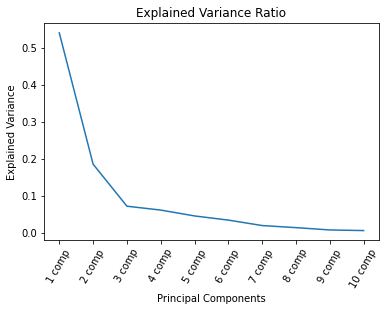

In [31]:
plt.plot(range(m), pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.xticks(range(m), [f"{i+1} comp" for i in range(m)], rotation=60)
plt.title('Explained Variance Ratio')
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [32]:
from sklearn import metrics
def count_metric(pca):
    return np.sum(pca.explained_variance_ratio_)

pca_rates = {}

In [33]:
for m in range(1, trainee.shape[1]):
    pcai = PCA(n_components=m)
    pcai = pcai.fit(trainee)

    pca_rates.update({m: count_metric(pcai)})
pca_rates

{1: 0.5413554928548416,
 2: 0.7269873308659892,
 3: 0.798787518988324,
 4: 0.8600672744965818,
 5: 0.905479296857806,
 6: 0.9395694619101258,
 7: 0.9589400561484616,
 8: 0.9726407054748575,
 9: 0.9800585462344793,
 10: 0.9858245814277549,
 11: 0.9900705264951568,
 12: 0.9934964199404709,
 13: 0.9961022054579378,
 14: 0.9977826898358914,
 15: 0.9990745795191164,
 16: 0.9997930275520649}

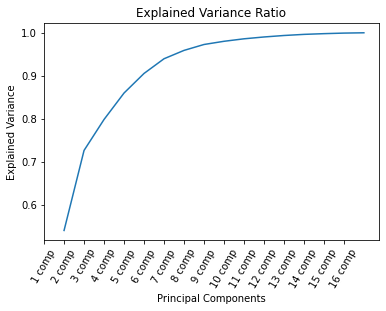

In [34]:
# sns.lineplot(x=pca_rates.keys(), y=pca_rates.values())

plt.plot(list(pca_rates.keys()), list(pca_rates.values()))
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.xticks(range(m), [f"{i+1} comp" for i in range(m)], rotation=60)
plt.title('Explained Variance Ratio')
plt.show()

Данные уже нормализованы (и нормализация нужна для PCA хотя бы потому, что завязано все на дисперсии, которая чувствительная к разным масштабам признаков). Я оставлю m = 11 или 10, т.к. при m < 9 процент сохраненной информации начинает убывать все быстрее.

In [35]:
m = 11
pca = PCA(n_components=m)
trainee_pca = pca.fit_transform(trainee)
testee_pca  = pca.transform(testee)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

def preprocess_(X):

    # if 'radius ratio' in X.columns.to_list():
    #     del X['radius ratio']
    #     del X['radius ratio']

    mask = (X[outliers_cols[0]] > 80) | (X[outliers_cols[0]] < 40)
    X.loc[mask, outliers_cols[0]] = X[outliers_cols[0]].median()

    mask = (X[outliers_cols[1]] > 20) | (X[outliers_cols[1]] < 0)
    X.loc[mask, outliers_cols[1]] = X[outliers_cols[1]].median()

    mask = (X[outliers_cols[2]] > 900) | (X[outliers_cols[2]] < 0)
    X.loc[mask, outliers_cols[2]] = X[outliers_cols[2]].median()

    mask = (X[outliers_cols[3]] > 90) | (X[outliers_cols[3]] < 50)
    X.loc[mask, outliers_cols[3]] = X[outliers_cols[3]].median()

    mask = (X[outliers_cols[4]] > 40) | (X[outliers_cols[4]] < 0)
    X.loc[mask, outliers_cols[4]] = X[outliers_cols[4]].median()

    return X

preprocess = FunctionTransformer(preprocess_)
trainee, trainee_y = X_train_pd.drop(columns=['label']), X_train_pd['label']
testee, testee_y = X_test_pd.drop(columns=['label']), X_test_pd['label']

In [37]:
logreg_pipeline = Pipeline([
    ('preprocess', preprocess),
    ('scaler', preprocessing.StandardScaler()),
    ('pca', PCA(n_components=m)),
    # ('clflog', LogisticRegression(random_state=42, multi_class='multinomial', tol=1e-3, max_iter=500))
    ])

In [38]:
logreg_pipeline = logreg_pipeline.fit(trainee, trainee_y)
trainee_pca = logreg_pipeline.transform(trainee)
testee_pca  = logreg_pipeline.transform(testee)

In [39]:
parameters = {'penalty':['none', 'l2'],
              'C': [0.0001, 0.001, 0.01, 0.1, 0.5, 1]}

clf = LogisticRegression(random_state=42, multi_class='multinomial', tol=1e-3, max_iter=500, solver='saga')
cv = RepeatedStratifiedKFold(n_splits=6, n_repeats=3, random_state=42)
grid_search = GridSearchCV(estimator=clf, param_grid=parameters, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
grid_search = grid_search.fit(trainee_pca, trainee_y)

print("tuned hyperparameters :(best parameters) ", grid_search.best_params_)
print("accuracy :", grid_search.best_score_)

tuned hyperparameters :(best parameters)  {'C': 0.0001, 'penalty': 'none'}
accuracy : 0.7383606731432819


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


In [40]:
grid_search.best_estimator_, grid_search.best_estimator_.penalty, grid_search.best_estimator_.C

(LogisticRegression(C=0.0001, max_iter=500, multi_class='multinomial',
                    penalty='none', random_state=42, solver='saga', tol=0.001),
 'none',
 0.0001)

Стало хуже, что ж, бывает.

In [41]:
bclf = LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42, solver='saga', tol=0.001, penalty='l2', C=1.0)
bclf = bclf.fit(trainee, trainee_y)

In [42]:
from sklearn.metrics import accuracy_score, f1_score
from scikitplot.metrics import plot_roc

accuracy_score(testee_y, bclf.predict(testee)), f1_score(testee_y, bclf.predict(testee), average='weighted')

(0.6936026936026936, 0.6789144345527655)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

<Figure size 1440x1440 with 0 Axes>

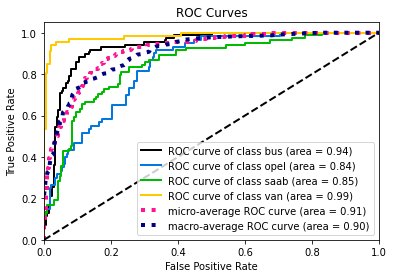

In [43]:
plt.figure(figsize=(20, 20))
plot_roc(testee_y, bclf.predict_proba(testee))

Но грузовики все еще предсказываем хорошо! Значит они хорошо отделимы логистической регрессией.

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [44]:
from sklearn.tree import DecisionTreeClassifier

parameters = {"criterion": ["gini", "entropy"],
              "splitter": ["best", "random"],
              "max_depth": [None, 2, 3, 5, 10, 15, 20, 25, 30, 35, 100],
              "min_samples_leaf": [1, 2, 5, 10],
              "max_features": [None, "auto", "sqrt", "log2"]}

clf = DecisionTreeClassifier(random_state=42, class_weight="balanced")
cv = RepeatedStratifiedKFold(n_splits=6, n_repeats=3, random_state=42)

grid_search = GridSearchCV(estimator=clf, param_grid=parameters, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
grid_search = grid_search.fit(trainee, trainee_y)

print("tuned hyperparameters :(best parameters) ", grid_search.best_params_)
print("accuracy :", grid_search.best_score_)

dectree_best_params = grid_search.best_params_

tuned hyperparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 5, 'splitter': 'best'}
accuracy : 0.6982468015076709


In [45]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       min_samples_leaf=5, random_state=42)

In [46]:
bclf = DecisionTreeClassifier(random_state=42, **grid_search.best_params_)
bclf = bclf.fit(trainee, trainee_y)

In [47]:
from sklearn.metrics import accuracy_score, f1_score
from scikitplot.metrics import plot_roc

accuracy_score(testee_y, bclf.predict(testee)), f1_score(testee_y, bclf.predict(testee), average='weighted')

(0.734006734006734, 0.7300937685752499)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

<Figure size 1440x1440 with 0 Axes>

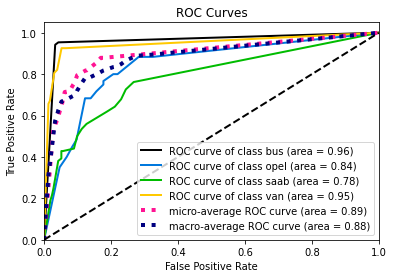

In [48]:
plt.figure(figsize=(20, 20))
plot_roc(testee_y, bclf.predict_proba(testee))

Теперь лучше предсказываем автобусы. В целом, van и bus хорошо распознаются, видимо, во многом благодаря тому, что они отделимы индикаторами по некоторым признакам (лежат в определенном интервале для определенной метки, как обсуждалось выше в разделе анализа)

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [49]:
trainee, trainee_y = X_train_pd.drop(columns=['label']), X_train_pd['label']
testee, testee_y = X_test_pd.drop(columns=['label']), X_test_pd['label']

In [50]:
pipeline = Pipeline([
    ('preprocess', preprocess),
    ('scaler', scaler),
    ])
testee = pipeline.transform(testee)

In [51]:
X_train_pd_cp = X_train_pd.copy()

In [52]:
def warn(*args, **kwargs):
    pass

import warnings
warnings.warn = warn

logistic regressions:

In [53]:
from sklearn.utils import resample

N = trainee.shape[0]
Nmin, Nmax = 2, 100

samples = [resample(X_train_pd_cp, replace=True, n_samples=N) for _ in range(Nmax)]
f1_scores = []
accuracy_scores = []

id2label = {0: 'bus', 3: 'van', 2: 'saab', 1: 'opel'}

for Ni in range(2, 100, 5):
    print(f"####################### Experiment {Ni} ##########################")
    logreg_ens = []
    for model_idx in range(Ni):
        print(f"Model {model_idx}")
        model = LogisticRegression(max_iter=500, multi_class='multinomial', random_state=42, solver='saga', tol=0.001, **logreg_best_params)
        trainee_i, trainee_y_i = samples[model_idx].drop(columns=['label']), samples[model_idx]['label']
        trainee_i = pipeline.transform(trainee_i)
        model = model.fit(trainee_i, trainee_y_i)
        logreg_ens.append(model)

    preds = logreg_ens[0].predict_proba(testee)
    for model_idx in range(1, Ni):
        preds += logreg_ens[model_idx].predict_proba(testee)
    preds /= Ni
    preds = np.argmax(preds, axis=-1)
    preds = np.vectorize(id2label.get)(preds)

    f1_scores.append(f1_score(testee_y, preds, average='weighted'))
    accuracy_scores.append(accuracy_score(testee_y, preds))
    

####################### Experiment 2 ##########################
Model 0
Model 1
####################### Experiment 7 ##########################
Model 0
Model 1
Model 2
Model 3
Model 4
Model 5
Model 6
####################### Experiment 12 ##########################
Model 0
Model 1
Model 2
Model 3
Model 4
Model 5
Model 6
Model 7
Model 8
Model 9
Model 10
Model 11
####################### Experiment 17 ##########################
Model 0
Model 1
Model 2
Model 3
Model 4
Model 5
Model 6
Model 7
Model 8
Model 9
Model 10
Model 11
Model 12
Model 13
Model 14
Model 15
Model 16
####################### Experiment 22 ##########################
Model 0
Model 1
Model 2
Model 3
Model 4
Model 5
Model 6
Model 7
Model 8
Model 9
Model 10
Model 11
Model 12
Model 13
Model 14
Model 15
Model 16
Model 17
Model 18
Model 19
Model 20
Model 21
####################### Experiment 27 ##########################
Model 0
Model 1
Model 2
Model 3
Model 4
Model 5
Model 6
Model 7
Model 8
Model 9
Model 10
Model 11
Model 12
Mode

####################### Experiment 92 ##########################
Model 0
Model 1
Model 2
Model 3
Model 4
Model 5
Model 6
Model 7
Model 8
Model 9
Model 10
Model 11
Model 12
Model 13
Model 14
Model 15
Model 16
Model 17
Model 18
Model 19
Model 20
Model 21
Model 22
Model 23
Model 24
Model 25
Model 26
Model 27
Model 28
Model 29
Model 30
Model 31
Model 32
Model 33
Model 34
Model 35
Model 36
Model 37
Model 38
Model 39
Model 40
Model 41
Model 42
Model 43
Model 44
Model 45
Model 46
Model 47
Model 48
Model 49
Model 50
Model 51
Model 52
Model 53
Model 54
Model 55
Model 56
Model 57
Model 58
Model 59
Model 60
Model 61
Model 62
Model 63
Model 64
Model 65
Model 66
Model 67
Model 68
Model 69
Model 70
Model 71
Model 72
Model 73
Model 74
Model 75
Model 76
Model 77
Model 78
Model 79
Model 80
Model 81
Model 82
Model 83
Model 84
Model 85
Model 86
Model 87
Model 88
Model 89
Model 90
Model 91
####################### Experiment 97 ##########################
Model 0
Model 1
Model 2
Model 3
Model 4
Model 5
Mode

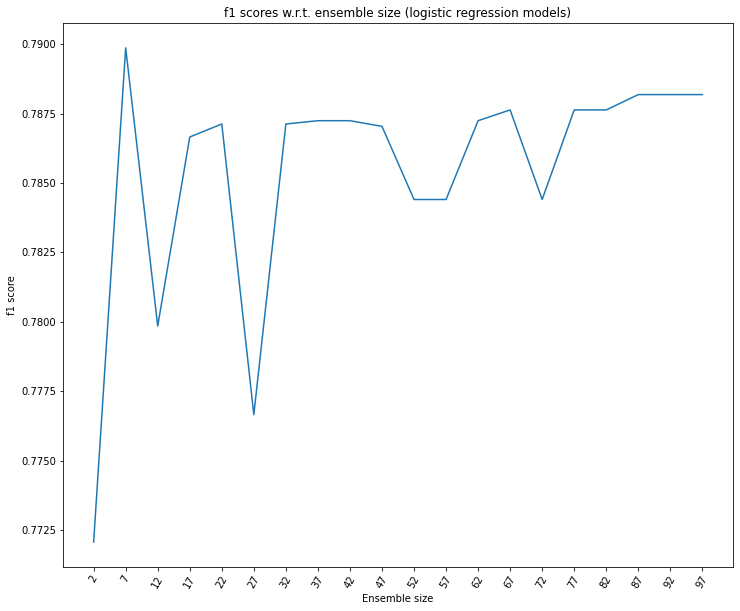

In [54]:
plt.figure(figsize=(12, 10))

plt.plot(range(2, 100, 5), f1_scores)
plt.ylabel('f1 score')
plt.xlabel('Ensemble size')
plt.xticks(range(2, 100, 5), range(2, 100, 5), rotation=60)
plt.title('f1 scores w.r.t. ensemble size (logistic regression models)')
plt.show()

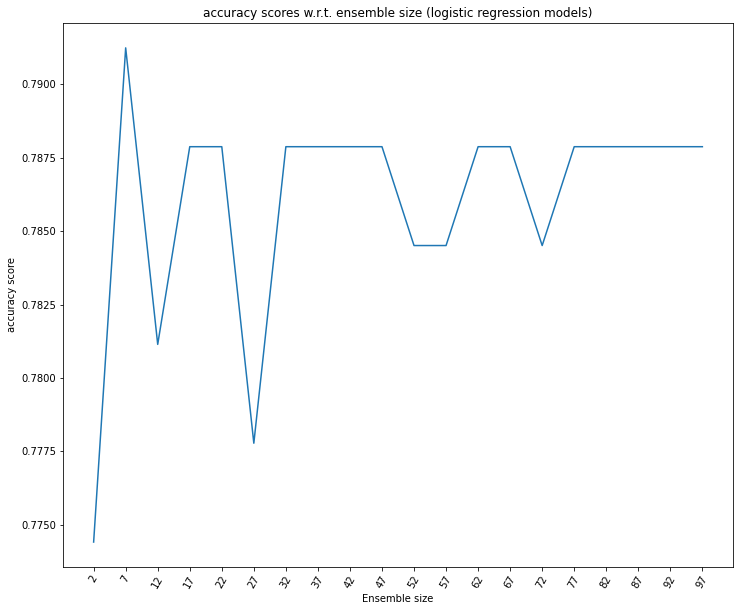

In [55]:
plt.figure(figsize=(12, 10))

plt.plot(range(2, 100, 5), accuracy_scores)
plt.ylabel('accuracy score')
plt.xlabel('Ensemble size')
plt.xticks(range(2, 100, 5), range(2, 100, 5), rotation=60)
plt.title('accuracy scores w.r.t. ensemble size (logistic regression models)')
plt.show()

decision trees:

In [56]:
from sklearn.utils import resample

N = trainee.shape[0]
Nmin, Nmax = 2, 100

samples = [resample(X_train_pd_cp, replace=True, n_samples=N) for _ in range(Nmax)]
f1_scores = []
accuracy_scores = []

id2label = {0: 'bus', 3: 'van', 2: 'saab', 1: 'opel'}

for Ni in range(2, 100, 5):
    print(f"####################### Experiment {Ni} ##########################")
    logreg_ens = []
    for model_idx in range(Ni):
        print(f"Model {model_idx}")
        model = DecisionTreeClassifier(random_state=42, class_weight="balanced", **dectree_best_params)
        trainee_i, trainee_y_i = samples[model_idx].drop(columns=['label']), samples[model_idx]['label']
        trainee_i = pipeline.transform(trainee_i)
        model = model.fit(trainee_i, trainee_y_i)
        logreg_ens.append(model)

    preds = logreg_ens[0].predict_proba(testee)
    for model_idx in range(1, Ni):
        preds += logreg_ens[model_idx].predict_proba(testee)
    preds /= Ni
    preds = np.argmax(preds, axis=-1)
    preds = np.vectorize(id2label.get)(preds)

    f1_scores.append(f1_score(testee_y, preds, average='weighted'))
    accuracy_scores.append(accuracy_score(testee_y, preds))
    

####################### Experiment 2 ##########################
Model 0
Model 1
####################### Experiment 7 ##########################
Model 0
Model 1
Model 2
Model 3
Model 4
Model 5
Model 6
####################### Experiment 12 ##########################
Model 0
Model 1
Model 2
Model 3
Model 4
Model 5
Model 6
Model 7
Model 8
Model 9
Model 10
Model 11
####################### Experiment 17 ##########################
Model 0
Model 1
Model 2
Model 3
Model 4
Model 5
Model 6
Model 7
Model 8
Model 9
Model 10
Model 11
Model 12
Model 13
Model 14
Model 15
Model 16
####################### Experiment 22 ##########################
Model 0
Model 1
Model 2
Model 3
Model 4
Model 5
Model 6
Model 7
Model 8
Model 9
Model 10
Model 11
Model 12
Model 13
Model 14
Model 15
Model 16
Model 17
Model 18
Model 19
Model 20
Model 21
####################### Experiment 27 ##########################
Model 0
Model 1
Model 2
Model 3
Model 4
Model 5
Model 6
Model 7
Model 8
Model 9
Model 10
Model 11
Model 12
Mode

Model 5
Model 6
Model 7
Model 8
Model 9
Model 10
Model 11
Model 12
Model 13
Model 14
Model 15
Model 16
Model 17
Model 18
Model 19
Model 20
Model 21
Model 22
Model 23
Model 24
Model 25
Model 26
Model 27
Model 28
Model 29
Model 30
Model 31
Model 32
Model 33
Model 34
Model 35
Model 36
Model 37
Model 38
Model 39
Model 40
Model 41
Model 42
Model 43
Model 44
Model 45
Model 46
Model 47
Model 48
Model 49
Model 50
Model 51
Model 52
Model 53
Model 54
Model 55
Model 56
Model 57
Model 58
Model 59
Model 60
Model 61
Model 62
Model 63
Model 64
Model 65
Model 66
Model 67
Model 68
Model 69
Model 70
Model 71
Model 72
Model 73
Model 74
Model 75
Model 76
Model 77
Model 78
Model 79
Model 80
Model 81
Model 82
Model 83
Model 84
Model 85
Model 86
Model 87
Model 88
Model 89
Model 90
Model 91
####################### Experiment 97 ##########################
Model 0
Model 1
Model 2
Model 3
Model 4
Model 5
Model 6
Model 7
Model 8
Model 9
Model 10
Model 11
Model 12
Model 13
Model 14
Model 15
Model 16
Model 17
Model

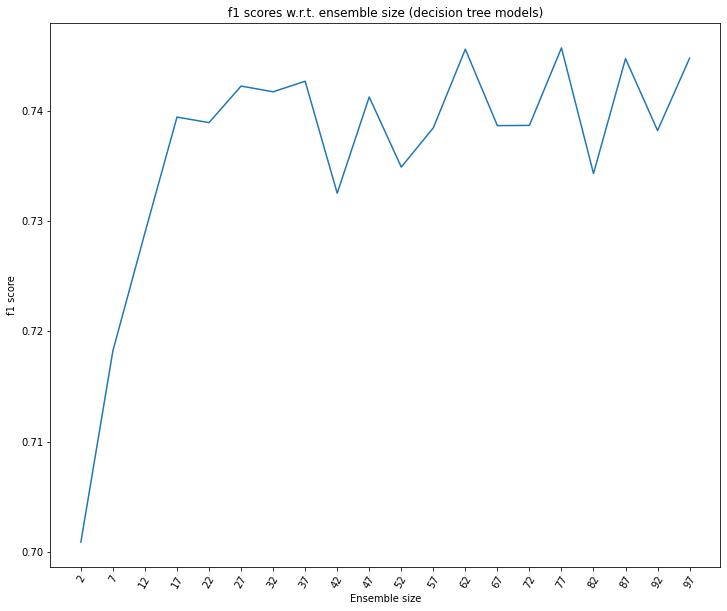

In [57]:
plt.figure(figsize=(12, 10))

plt.plot(range(2, 100, 5), f1_scores)
plt.ylabel('f1 score')
plt.xlabel('Ensemble size')
plt.xticks(range(2, 100, 5), range(2, 100, 5), rotation=60)
plt.title('f1 scores w.r.t. ensemble size (decision tree models)')
plt.show()

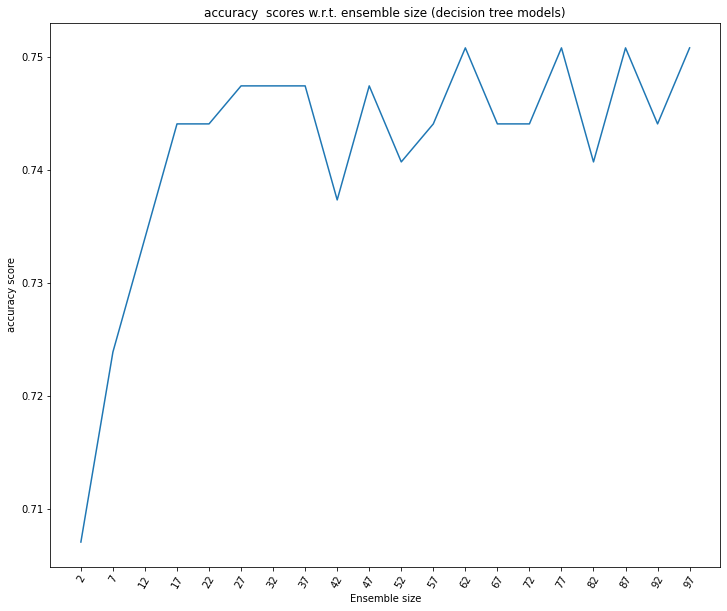

In [58]:
plt.figure(figsize=(12, 10))

plt.plot(range(2, 100, 5), accuracy_scores)
plt.ylabel('accuracy score')
plt.xlabel('Ensemble size')
plt.xticks(range(2, 100, 5), range(2, 100, 5), rotation=60)
plt.title('accuracy  scores w.r.t. ensemble size (decision tree models)')
plt.show()

Ансамбль лог. регрессий лучше всего показал себя при N в районе 12, потом скор резко упал, при больших N был хуже. 
С ансамблем деревьев в плане спада ситуация лучше, опять наблюдали резкое падение, которое началось в интервале [20,27]. Также есть некие "долины" в случаях обеих моделей в районе N=60. 

Видим, что ансамбль деревьев смог достичь при некоторых N результатов single логистической модели.

Почему-то ансамбли регрессий лучше работают на маленьких N, при больших сильно ошибаются. Деревья же имеют тенденцию работать хорошо и при больших N.
Возможно это связано с разницей в видах разделяющих поверхностей - ведь в случае деревьев получаем более "рваные" поверхности, которые могут переобучаться под трейн. И тогда с ростом N эти переобучения будут сглаживаться и усреднять друг друга, в итоге будем получать хороший скор.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
pipeline = Pipeline([
    ('preprocess', preprocess),
    ('scaler', scaler),
    ])

trainee, trainee_y = X_train_pd.drop(columns=['label']), X_train_pd['label']
testee, testee_y = X_test_pd.drop(columns=['label']), X_test_pd['label']
trainee = pipeline.transform(trainee)
testee = pipeline.transform(testee)

In [61]:
dectree_best_params

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 5,
 'splitter': 'best'}

In [62]:
parameters = {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1}

In [63]:
f1_scores = []
accuracy_scores = []

id2label = {0: 'bus', 3: 'van', 2: 'saab', 1: 'opel'}

for Ni in range(2, 100, 5):
    print(f"####################### Experiment {Ni} ##########################")
    model = RandomForestClassifier(random_state=42, class_weight="balanced", n_estimators=Ni, **parameters)
    model = model.fit(trainee, trainee_y)

    preds = model.predict(testee)

    f1_scores.append(f1_score(testee_y, preds, average='weighted'))
    accuracy_scores.append(accuracy_score(testee_y, preds))
  

####################### Experiment 2 ##########################
####################### Experiment 7 ##########################
####################### Experiment 12 ##########################
####################### Experiment 17 ##########################
####################### Experiment 22 ##########################
####################### Experiment 27 ##########################
####################### Experiment 32 ##########################
####################### Experiment 37 ##########################
####################### Experiment 42 ##########################
####################### Experiment 47 ##########################
####################### Experiment 52 ##########################
####################### Experiment 57 ##########################
####################### Experiment 62 ##########################
####################### Experiment 67 ##########################
####################### Experiment 72 ##########################
####################### Exp

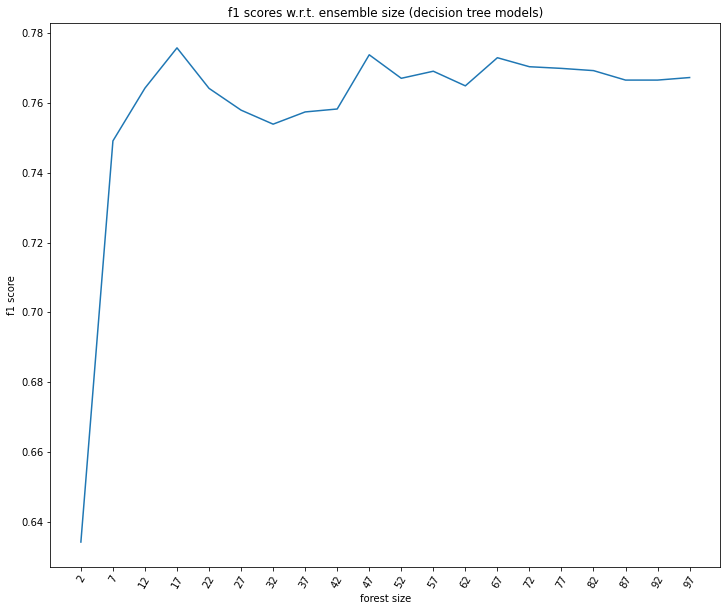

In [64]:
plt.figure(figsize=(12, 10))

plt.plot(range(2, 100, 5), f1_scores)
plt.ylabel('f1 score')
plt.xlabel('forest size')
plt.xticks(range(2, 100, 5), range(2, 100, 5), rotation=60)
plt.title('f1 scores w.r.t. ensemble size (decision tree models)')
plt.show()

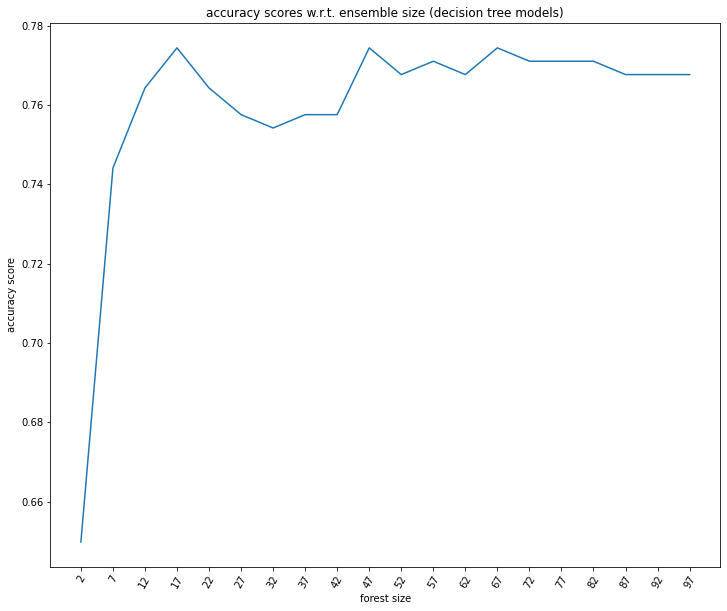

In [65]:
plt.figure(figsize=(12, 10))

plt.plot(range(2, 100, 5), accuracy_scores)
plt.ylabel('accuracy score')
plt.xlabel('forest size')
plt.xticks(range(2, 100, 5), range(2, 100, 5), rotation=60)
plt.title('accuracy scores w.r.t. ensemble size (decision tree models)')
plt.show()

Графики отдаленно напоминает графики крафтового ансамбля, только падения посередине нет. Никак не могу объяснить его отсутствие в этом случае, какие-то эвристики/оптимизации от разработчиков sklearn?

В принципе мысли о разнице деревьев и регрессий написаны в пункте выше.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [66]:
batch_size = trainee.shape[0] // 10
delimeters = list(range(0, trainee.shape[0], batch_size))
samples_trainee = [trainee[i:i + batch_size].tolist() for i in delimeters]
samples_trainee_y = [trainee_y[i:i + batch_size].tolist() for i in delimeters]

In [67]:
train_sample = []
train_y_sample = []

accuracy_scores = []
f1_scores  = []

i = 1
for (X, y) in zip(samples_trainee, samples_trainee_y):
    print(f"####################### Experiment {i} ##########################")
    forest = RandomForestClassifier(random_state=42, class_weight="balanced", n_estimators=Ni, **parameters)
    tree = DecisionTreeClassifier(random_state=42, class_weight="balanced", **dectree_best_params)
    logreg = LogisticRegression(max_iter=500, multi_class='multinomial', random_state=42, solver='saga', tol=0.001, **logreg_best_params)

    train_sample += X
    train_y_sample += y

    forest = forest.fit(np.array(train_sample), np.array(train_y_sample))
    tree   = tree.fit(np.array(train_sample), np.array(train_y_sample))
    logreg = logreg.fit(np.array(train_sample), np.array(train_y_sample))

    f1_scores.append(
        [f1_score(testee_y, forest.predict(testee), average='weighted'),
         f1_score(testee_y, tree.predict(testee), average='weighted'),
         f1_score(testee_y, logreg.predict(testee), average='weighted'),
        ]
    )

    accuracy_scores.append(
        [accuracy_score(testee_y, forest.predict(testee)),
         accuracy_score(testee_y, tree.predict(testee)),
         accuracy_score(testee_y, logreg.predict(testee)),
        ]
    )

    i += 1

####################### Experiment 1 ##########################
####################### Experiment 2 ##########################
####################### Experiment 3 ##########################
####################### Experiment 4 ##########################
####################### Experiment 5 ##########################
####################### Experiment 6 ##########################
####################### Experiment 7 ##########################
####################### Experiment 8 ##########################
####################### Experiment 9 ##########################
####################### Experiment 10 ##########################
####################### Experiment 11 ##########################


In [68]:
accuracy_scores

[[0.632996632996633, 0.6127946127946128, 0.6498316498316499],
 [0.7104377104377104, 0.6531986531986532, 0.7239057239057239],
 [0.7037037037037037, 0.6599326599326599, 0.7508417508417509],
 [0.7373737373737373, 0.6835016835016835, 0.7508417508417509],
 [0.7542087542087542, 0.6902356902356902, 0.7845117845117845],
 [0.7744107744107744, 0.7104377104377104, 0.7643097643097643],
 [0.797979797979798, 0.7070707070707071, 0.7710437710437711],
 [0.7744107744107744, 0.6868686868686869, 0.7710437710437711],
 [0.7777777777777778, 0.7070707070707071, 0.7811447811447811],
 [0.7643097643097643, 0.7239057239057239, 0.7845117845117845],
 [0.7676767676767676, 0.7407407407407407, 0.7845117845117845]]

ValueError: x and y must have same first dimension, but have shapes (20,) and (11, 3)

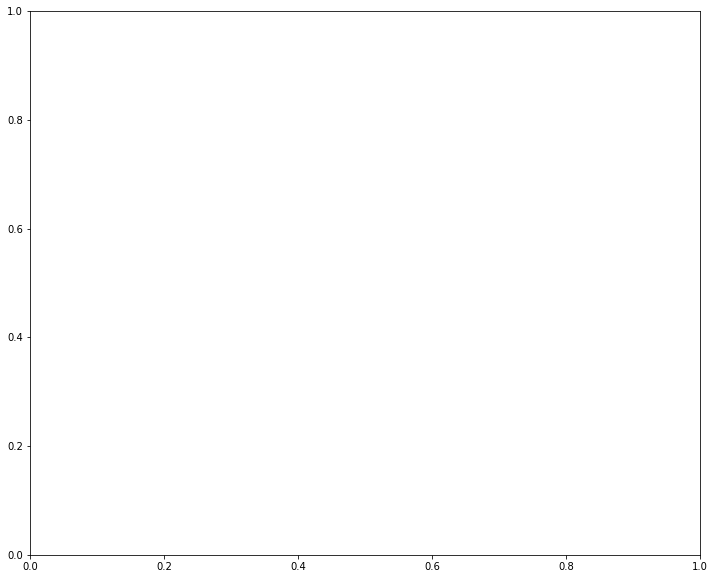

In [69]:
plt.figure(figsize=(12, 10))

plt.plot(range(2, 100, 5), accuracy_scores)
plt.ylabel('accuracy score')
plt.xlabel('forest size')
plt.xticks(range(2, 100, 5), range(2, 100, 5), rotation=60)
plt.title('accuracy scores w.r.t. ensemble size (decision tree models)')

plt.plot(range(2, 100, 5), g1_scores)
plt.show()